In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("./insurance.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [4]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [9]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [10]:
df.groupby('sex').mean()

,age,bmi,children,expenses
sex,,,,
female,39.503021,30.379758,1.074018,12569.578897
male,38.917160,30.945266,1.115385,13956.751420


<AxesSubplot:xlabel='region', ylabel='expenses'>

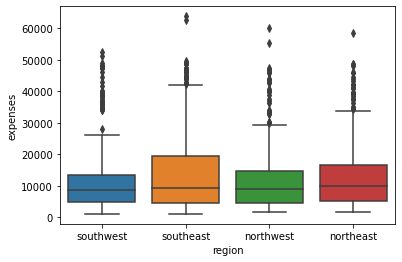

In [12]:
sns.boxplot(x='region', y='expenses', data=df)

#### Model 


In [14]:
le = LabelEncoder()

In [15]:
df.sex = le.fit_transform(df.sex)
df.smoker = le.fit_transform(df.smoker)
df.region = le.fit_transform(df.region)

<AxesSubplot:xlabel='age', ylabel='smoker'>

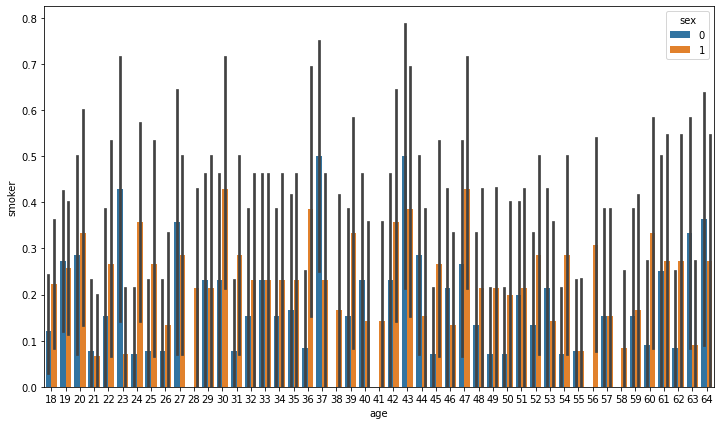

In [16]:
plt.figure(figsize = (12,7))
sns.barplot(x = df.age, y = df.smoker, hue = df.sex)

<AxesSubplot:xlabel='smoker', ylabel='expenses'>

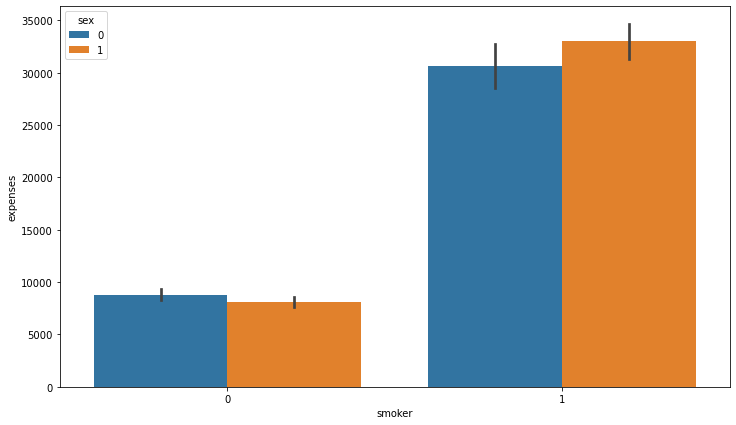

In [18]:
plt.figure(figsize = (12,7))
sns.barplot(x = df.smoker, y = df.expenses, hue = df.sex)

<AxesSubplot:>

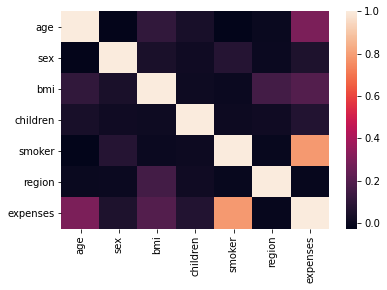

In [19]:
sns.heatmap(df.corr())

#### Spliting the data into Dependent and Independent

In [31]:
X = df.drop(['expenses'], axis = 1)

In [32]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,3
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,1
4,32,1,28.9,0,0,1
...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1
1334,18,0,31.9,0,0,0
1335,18,0,36.9,0,0,2
1336,21,0,25.8,0,0,3


In [33]:
Y = df.expenses

In [34]:
Y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

#### Model Evaluation/Accuracy

#### Linear Regression Model 

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

In [37]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [39]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [40]:
Y_pred = model.predict(X_test)

In [41]:
print("Training Accuracy :", model.score(X_train, Y_train))
print("Testing Accuracy :", model.score(X_test, Y_test))

Training Accuracy : 0.751075290083467
Testing Accuracy : 0.7466215091988693


#### Decision Tree Regressor

In [43]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [50]:
model1 = DecisionTreeRegressor()
model1.fit(X_train, Y_train)

DecisionTreeRegressor()

In [51]:
Y_pred = model1.predict(X_test)

In [52]:
print("Training Accuracy :", model1.score(X_train, Y_train))
print("Testing Accuracy :", model1.score(X_test, Y_test))

Training Accuracy : 0.9994978870400699
Testing Accuracy : 0.7046957253926841


In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
model2 = DecisionTreeRegressor()
model2.fit(X_train, Y_train)

DecisionTreeRegressor()

In [55]:
Y_pred = model2.predict(X_test)

In [56]:
print("Training Accuracy :", model2.score(X_train, Y_train))
print("Testing Accuracy :", model2.score(X_test, Y_test))

Training Accuracy : 0.9994978870400699
Testing Accuracy : 0.7038608423819884
